# Imports

In [1]:
# Import the required libraries 
from sklearn.feature_extraction.text import TfidfVectorizer
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import np_utils
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

Using TensorFlow backend.


## Processing Dataset

In [2]:
text_dir = '/home/foodlovers/FoodVisor/data/texts_txt'

In [3]:
%%time
all_texts = datasets.load_files(text_dir, 
            description=None, categories=None, load_content=True, shuffle=False, 
                                        encoding='utf-8', decode_error='strict', random_state=0)

In [4]:
all_texts.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [5]:
all_texts.filenames[:5]

array(['/home/foodlovers/FoodVisor/data/texts_txt/apple_pie/apple_pie_0.txt',
       '/home/foodlovers/FoodVisor/data/texts_txt/apple_pie/apple_pie_1.txt',
       '/home/foodlovers/FoodVisor/data/texts_txt/apple_pie/apple_pie_10.txt',
       '/home/foodlovers/FoodVisor/data/texts_txt/apple_pie/apple_pie_100.txt',
       '/home/foodlovers/FoodVisor/data/texts_txt/apple_pie/apple_pie_101.txt'],
      dtype='<U97')

In [6]:
all_texts.target_names[:5]

['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare']

In [7]:
all_texts.target[:5]

array([0, 0, 0, 0, 0])

## Preprocessing words

In [8]:
all_docs = all_texts.data

In [9]:
type(all_docs)

list

In [10]:
len(all_docs)

93409

In [15]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from nltk.stem import PorterStemmer

In [20]:
#import nltk
#nltk.download('stopwords')
#nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/foodlovers/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [18]:
stop_words = set(stopwords.words('english')) 
porter = PorterStemmer()

In [21]:
%%time
proc_docs = []

for doc in all_docs:
    word_tokens = word_tokenize(doc) 
    processed = [w for w in word_tokens if not w in stop_words]
    processed = [porter.stem(w) for w in word_tokens]
    proc_docs.append(processed)

CPU times: user 56min 45s, sys: 6.24 s, total: 56min 51s
Wall time: 56min 51s


In [ ]:
import re

In [120]:
%%time
for doc in proc_docs:
    for i in range(len(doc)) :
        doc[i] = doc[i].lstrip().rstrip()
        doc[i] = re.sub(r"[\^\$\-()\"#/@;:<>{}`+=~|\]\[._\\!?,%&*0-9]", "", doc[i])

CPU times: user 4min 20s, sys: 850 ms, total: 4min 21s
Wall time: 4min 21s


In [34]:
def words_count(corps):
    dic = {}
    for doc in corps:
        for w in doc :
            dic[w] = dic.get(w, 0) + 1
    return dic

In [121]:
vocab = words_count(proc_docs)

In [122]:
vocab_doc = dict()
for doc in proc_docs:
    doc = set(doc)
    for w in doc :
        vocab_doc[w] = vocab_doc.get(w, 0) + 1

In [123]:
vocab['recip']

2048895

In [124]:
vocab_doc['recip']

89548

In [125]:
len(vocab)

821569

In [126]:
len(vocab_doc)

821569

In [26]:
def top_words(count, get = 20, reverse=True) :
    c = 0
    for w in sorted(count, key=count.get, reverse=reverse):
        c += 1
        if c > get :
            break
        print(w,": ", count[w])

In [27]:
def slice_words(count, below, top) :
    """
    Remove words that occur less than (and more than) a number of time  \n
    and return the removed words.
    """
    c = 0
    removed_words = []
    # bottom up
    for w in sorted(count, key=count.get, reverse=False):
        if count[w] < below :
            c += 1
            removed_words.append(w)
            # print(w,": ", count[w])
        else:
            break
    # top down
    for w in sorted(count, key=count.get, reverse=True):
        if count[w] > top :
            c += 1
            removed_words.append(w)
            # print(w,": ", count[w])
        else:
            break
    print(c, " words to be removed.")
    return removed_words

In [127]:
top_words(vocab_doc,500)

 :  92604
and :  90534
to :  90287
the :  90249
a :  89866
recip :  89548
of :  89506
in :  88587
with :  88375
for :  88148
on :  85736
you :  85132
thi :  82973
about :  81848
your :  79999
or :  79697
is :  78768
all :  78765
from :  77758
by :  77089
's :  76371
it :  76082
food :  75827
cook :  75138
make :  74000
use :  73816
home :  73352
more :  73145
are :  71965
at :  68976
ingredi :  68508
be :  67693
that :  66451
like :  65690
serv :  65316
can :  65231
add :  64172
not :  64002
contact :  63681
time :  63610
I :  63080
have :  63007
new :  62974
top :  61516
up :  61461
email :  61382
get :  61087
one :  60937
will :  60558
into :  59733
comment :  59208
minut :  59148
as :  58851
out :  58561
an :  58551
post :  58534
how :  57708
our :  57190
dish :  56933
right :  56187
blog :  56111
easi :  55857
search :  55814
just :  55647
but :  55458
A :  55339
share :  55115
In :  54658
over :  54429
until :  54104
what :  53932
love :  53568
cup :  53441
so :  53367
It :  53076

In [128]:
top_words(vocab_doc,50,reverse =False)

piemavencom :  1
acreliu :  1
topandbottom :  1
boecxken :  1
ochef :  1
ginster :  1
'een :  1
kookhistorienl :  1
wwwusappleorgconsumersallaboutappleshistoryandfolkloreapplesinamerica :  1
'rehabilitate' :  1
farlex :  1
boardsstraightdopecom :  1
sorghvuldig :  1
sucrosecom :  1
cokeryen :  1
notabel :  1
piemaven :  1
americanet :  1
huyshoudst :  1
verstandig :  1
pietowncom :  1
titleapplepi :  1
cofyn :  1
piefil :  1
wwwtasteofhomecomrecipesapple :  1
sgronholz :  1
pielover :  1
peasshell :  1
summerlili :  1
mumsy :  1
catmom :  1
extractit :  1
tinngo :  1
berniciu :  1
watcm :  1
shcoke :  1
streussel :  1
grann :  1
raisinfre :  1
bananabobana :  1
noraisinsonmyparad :  1
kidstir :  1
appetizerthem :  1
jeannieallen :  1
halfhil :  1
mamest :  1
nevou :  1
buffaloshrimp :  1
dragonflies :  1
'couples :  1


In [133]:
removed_words = slice_words(vocab_doc, 15,53000)

757005  words to be removed.


In [130]:
top_words(vocab,50)

 :  54754376
the :  4523309
and :  3516273
to :  2747460
a :  2515936
recip :  2048895
I :  2002130
of :  1840784
in :  1430492
with :  1375447
for :  1372872
you :  1246047
it :  1204130
thi :  971061
is :  871674
on :  865717
at :  841081
'' :  803414
your :  752276
's :  734711
or :  715532
that :  638427
from :  561102
make :  543725
cook :  526267
food :  525307
have :  494445
use :  471031
repli :  470176
my :  466193
are :  458809
more :  451874
all :  436862
by :  414062
like :  411861
but :  408586
about :  408205
wa :  405334
be :  403440
post :  389923
as :  360298
so :  356028
add :  354571
comment :  354438
can :  353177
not :  351826
n't :  347864
cup :  321719
chicken :  307887
love :  307836


In [132]:
removed_words_2 = slice_words(vocab, 15,340000)

743616  words to be removed.


In [134]:
len(set(removed_words).intersection(set(removed_words_2)))

743611

In [135]:
new_stop_words = stop_words.union(set(removed_words)).union(set(removed_words_2))

In [140]:
%%time
new_proc_docs = []

cc = 0
for doc in proc_docs:
    processed = [w for w in doc if (w not in new_stop_words and len(w) > 1)]
    new_proc_docs.append(processed)
    cc += 1
    if cc%1000 == 0 :
        print(cc,"/",len(proc_docs))

1000 / 93409
2000 / 93409
3000 / 93409
4000 / 93409
5000 / 93409
6000 / 93409
7000 / 93409
8000 / 93409
9000 / 93409
10000 / 93409
11000 / 93409
12000 / 93409
13000 / 93409
14000 / 93409
15000 / 93409
16000 / 93409
17000 / 93409
18000 / 93409
19000 / 93409
20000 / 93409
21000 / 93409
22000 / 93409
23000 / 93409
24000 / 93409
25000 / 93409
26000 / 93409
27000 / 93409
28000 / 93409
29000 / 93409
30000 / 93409
31000 / 93409
32000 / 93409
33000 / 93409
34000 / 93409
35000 / 93409
36000 / 93409
37000 / 93409
38000 / 93409
39000 / 93409
40000 / 93409
41000 / 93409
42000 / 93409
43000 / 93409
44000 / 93409
45000 / 93409
46000 / 93409
47000 / 93409
48000 / 93409
49000 / 93409
50000 / 93409
51000 / 93409
52000 / 93409
53000 / 93409
54000 / 93409
55000 / 93409
56000 / 93409
57000 / 93409
58000 / 93409
59000 / 93409
60000 / 93409
61000 / 93409
62000 / 93409
63000 / 93409
64000 / 93409
65000 / 93409
66000 / 93409
67000 / 93409
68000 / 93409
69000 / 93409
70000 / 93409
71000 / 93409
72000 / 93409
7

In [141]:
len(new_proc_docs)

93409

In [142]:
new_vocab = words_count(new_proc_docs)

In [143]:
len(new_vocab)

64121

In [144]:
top_words(new_vocab, reverse = True)

chicken :  307887
sauc :  306111
bake :  305044
chees :  294412
egg :  290002
cake :  289429
oil :  283996
say :  283091
salt :  266564
pm :  260971
pepper :  257722
may :  249001
tri :  245260
day :  218062
thank :  216410
good :  214155
review :  213865
made :  210557
cream :  208003
look :  204734


In [145]:
top_words(new_vocab, reverse = False)

bridi :  15
cinnamonglaz :  15
cranberryalmond :  15
inextric :  15
janetfctc :  15
chiot :  15
creations… :  15
medal™ :  15
communiqu :  15
mulitpl :  15
montara :  15
typea :  15
luvcook :  15
monetarili :  15
bannist :  15
combination :  15
ganache :  15
complaining :  15
greataunt :  15
tfla :  15


In [146]:
" ".join(new_proc_docs[0])

"appl pie wikipedia free encyclopedia jump navig articl see appl pie disambigu appl pie appl pie lattic upper crust type dessert main appl sugar energi per around calori piec appl pie kcal cookbook appl pie appl pie tart tatin french variat appl pie An appl pie fruit pie tart princip fill appl sometim whip cream ice cream alongsid cheddar chees pastri gener doublecrust pie upper crust may circular shape crust pastri lattic woven strip except deepdish appl pie crust onli openfac tart tatin content english pud absenc sugar earli english dutch style swedish style appl pie american cultur see also refer extern link edit appl culinari appl bramley empir northern spi granni smith crisp acid fruit pie fresh reconstitut dri appl affect final textur length requir whether ha effect flavour pie matter opinion dri preserv appl origin substitut onli fresh fruit unavail appl pie often style la mode ice cream altern piec chees sharp cheddar occasion place alongsid slice finish pie english pud edit ta

In [147]:
new_proc_texts = []
for doc in new_proc_docs:
    new_proc_texts.append(" ".join(doc))

### Save processed files

In [148]:
print(len(new_proc_texts) == len(all_texts.filenames))

True


In [160]:
import os

for i in range(len(new_proc_texts)):
    path_dir = all_texts.filenames[i].copy()
    path_dir = re.sub('texts_txt','processed_texts_txt',path_dir)
    path_folder = "/".join(path_dir.split("/")[:-1])
    if not os.path.isdir(path_folder) :
        os.mkdir(path_folder)
    text_file = open(path_dir, "w")
    text_file.write(new_proc_texts[i])
    text_file.close()
    if i % 1000 == True:
        print(i,"/",len(new_proc_texts),"files saved.")

1 / 93409 files saved.
1001 / 93409 files saved.
2001 / 93409 files saved.
3001 / 93409 files saved.
4001 / 93409 files saved.
5001 / 93409 files saved.
6001 / 93409 files saved.
7001 / 93409 files saved.
8001 / 93409 files saved.
9001 / 93409 files saved.
10001 / 93409 files saved.
11001 / 93409 files saved.
12001 / 93409 files saved.
13001 / 93409 files saved.
14001 / 93409 files saved.
15001 / 93409 files saved.
16001 / 93409 files saved.
17001 / 93409 files saved.
18001 / 93409 files saved.
19001 / 93409 files saved.
20001 / 93409 files saved.
21001 / 93409 files saved.
22001 / 93409 files saved.
23001 / 93409 files saved.
24001 / 93409 files saved.
25001 / 93409 files saved.
26001 / 93409 files saved.
27001 / 93409 files saved.
28001 / 93409 files saved.
29001 / 93409 files saved.
30001 / 93409 files saved.
31001 / 93409 files saved.
32001 / 93409 files saved.
33001 / 93409 files saved.
34001 / 93409 files saved.
35001 / 93409 files saved.
36001 / 93409 files saved.
37001 / 93409 

## ---------------------------------------

## Convert to TFIDF vectors

In [161]:
text_train,text_test , y_train, y_test = train_test_split(
    new_proc_texts, all_texts.target, test_size=0.33, random_state=42)

In [162]:
y_train[:10]

array([81, 81, 42,  4, 70, 31, 21, 61, 44, 10])

In [163]:
# Feature Engineering 
print ("TF-IDF on text data ... ")
tfidf = TfidfVectorizer(binary=True)
X_train = tfidf.fit_transform(text_train)
#.astype('float16')
X_test = tfidf.transform(text_test)
#.astype('float16')
print ("Done ! ")

TF-IDF on text data ... 
Done ! 


In [204]:
X_train.shape

(62584, 60050)

In [165]:
train_size, num_words = X_train.shape
num_classes = len(all_texts.target_names)

In [166]:
test_size,_ = X_test.shape

In [210]:
from sklearn.decomposition import TruncatedSVD

clf = TruncatedSVD(1000)
clf.fit(X_train)
X_train_PCA = clf.transform(X_train)
X_test_PCA = clf.transform(X_test)

In [211]:
X_train_PCA.shape

(62584, 1000)

In [212]:
train_size, num_words = X_train_PCA.shape

In [216]:
%%time
clf = LinearSVC()
clf.fit(X_train_PCA, y_train)
print ("Predict on test data ... ")
y_pred = clf.predict(X_test_PCA)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : ", accuracy)

Predict on test data ... 
Accuracy :  0.8412327656123276
CPU times: user 2min 51s, sys: 223 ms, total: 2min 52s
Wall time: 2min 51s


## Keras model

In [214]:
from keras import models

# Build neural network
model = models.Sequential()
model.add(Dense(256, input_dim=num_words, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(80, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(num_classes, activation='softmax'))

# Compile model
model.compile(optimizer='adam',
              #loss='categorical_crossentropy',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train model
model.fit(X_train_PCA, y_train,
          batch_size=2048,
          epochs=50,
          verbose=1,
          validation_data=(X_test_PCA, y_test))

score = model.evaluate(X_test_PCA, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 62584 samples, validate on 30825 samples
Epoch 1/50
62584/62584 [==============================] - 2s 27us/step - loss: 4.5846 - acc: 0.0523 - val_loss: 4.5239 - val_acc: 0.1531
Epoch 2/50
62584/62584 [==============================] - 1s 17us/step - loss: 4.4047 - acc: 0.1545 - val_loss: 4.2064 - val_acc: 0.3341
Epoch 3/50
62584/62584 [==============================] - 1s 17us/step - loss: 3.9344 - acc: 0.2697 - val_loss: 3.5003 - val_acc: 0.5034
Epoch 4/50
62584/62584 [==============================] - 1s 17us/step - loss: 3.2067 - acc: 0.3637 - val_loss: 2.6703 - val_acc: 0.6070
Epoch 5/50
62584/62584 [==============================] - 1s 17us/step - loss: 2.5827 - acc: 0.4523 - val_loss: 2.1081 - val_acc: 0.6571
Epoch 6/50
62584/62584 [==============================] - 1s 17us/step - loss: 2.1765 - acc: 0.5158 - val_loss: 1.7654 - val_acc: 0.6922
Epoch 7/50
62584/62584 [==============================] - 1s 17us/step - loss: 1.9221 - acc: 0.5595 - val_loss: 1.5567 - val_acc

In [97]:
# Train model
model.fit(X_train, y_train,
          batch_size=2048,
          epochs=10,
          verbose=1,
          validation_data=(X_test, y_test))

score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 62584 samples, validate on 30825 samples
Epoch 1/10
62584/62584 [==============================] - 37s 595us/step - loss: 0.5223 - acc: 0.8709 - val_loss: 1.0235 - val_acc: 0.7813
Epoch 2/10
62584/62584 [==============================] - 37s 594us/step - loss: 0.4641 - acc: 0.8857 - val_loss: 1.0246 - val_acc: 0.7830
Epoch 3/10
62584/62584 [==============================] - 37s 593us/step - loss: 0.4174 - acc: 0.8989 - val_loss: 1.0356 - val_acc: 0.7854
Epoch 4/10
62584/62584 [==============================] - 37s 594us/step - loss: 0.3851 - acc: 0.9066 - val_loss: 1.0446 - val_acc: 0.7877
Epoch 5/10
62584/62584 [==============================] - 37s 594us/step - loss: 0.3522 - acc: 0.9151 - val_loss: 1.0560 - val_acc: 0.7856
Epoch 6/10
62584/62584 [==============================] - 37s 592us/step - loss: 0.3293 - acc: 0.9202 - val_loss: 1.0550 - val_acc: 0.7886
Epoch 7/10
62584/62584 [==============================] - 37s 593us/step - loss: 0.3048 - acc: 0.9259 - val_loss: 1.

## Torch model

In [81]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable

In [82]:
use_gpu = torch.cuda.is_available()
print('Using gpu: %s ' % use_gpu)

Using gpu: True 


In [88]:
use_gpu = False

In [83]:
criterion = nn.CrossEntropyLoss()

In [181]:
class myNet2(nn.Module):
    def __init__(self, input_size, num_classes):
        super(myNet2, self).__init__()
        self.classifier = nn.Sequential(
            nn.Linear(input_size, 256),
            nn.ReLU(True),
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.ReLU(True),
            nn.Dropout(0.3),
            nn.Linear(128, num_classes),
        ) 

    def forward(self, x):
        x = self.classifier(x)
        return x

In [232]:
net2 = myNet2(num_words, num_classes)
if use_gpu:
    net2 = net2.cuda()
optimizer2 = optim.Adam(net2.parameters())

In [218]:
print(net2)

myNet2(
  (classifier): Sequential(
    (0): Linear(in_features=1000, out_features=256, bias=True)
    (1): ReLU(inplace)
    (2): Dropout(p=0.3)
    (3): Linear(in_features=256, out_features=128, bias=True)
    (4): ReLU(inplace)
    (5): Dropout(p=0.3)
    (6): Linear(in_features=128, out_features=101, bias=True)
  )
)


In [192]:
class OurNet(nn.Module):
    def __init__(self, n_inputs, hidden_size, num_classes):
        super(OurNet, self).__init__()
        self.layer_1 = nn.Linear(n_inputs,hidden_size, bias=True)
        self.relu = nn.ReLU()
        self.layer_2 = nn.Linear(hidden_size, hidden_size, bias=True)
        self.output_layer = nn.Linear(hidden_size, num_classes, bias=True)
        self.dropout = nn.Dropout()

    def forward(self, x):
        out = self.layer_1(x)
        out = self.relu(out)
        out = self.dropout(out)
        out = self.layer_2(out)
        out = self.relu(out)
        out = self.dropout(out)
        out = self.output_layer(out)
        return out

In [236]:
net3 = OurNet(num_words, 100, num_classes)
if use_gpu:
    net3 = net3.cuda()
#ouroptimizer = optim.SGD(net3.parameters(), lr=0.01)
optimizer3 = optim.Adam(net3.parameters())

### Creating Data generator

In [229]:
def data_gen(data,labels,batch_size=64,shuffle=True):
    labels = np.array(labels)
    if shuffle:
        index = np.random.permutation(len(labels))
        data = data[index]
        labels = labels[index]
    for idx in range(0,len(labels),batch_size):
        if type(data).__module__ == 'numpy' :
            yield(data[idx:idx+batch_size],labels[idx:idx+batch_size])
        else :
            yield(data[idx:idx+batch_size].toarray(),labels[idx:idx+batch_size])

In [178]:
def train_model(model,
                train_data=None,train_labels=None, 
                test_data = None, test_labels = None,
                epochs=1, batch_size = 128,
                optimizer=None,criterion=None ,
                train=True,
                shuffle=True ):
    
    if train:
        loss_history = []
        acc_history = []
        val_loss_history = []
        val_acc_history = []
        
        model.train()
    else:
        model.eval()
        
    if train :
        for epoch in range(epochs):
            #================TRAINING=====================#
            batches = data_gen(data=train_data,labels=train_labels,batch_size = batch_size,shuffle=shuffle)

            running_loss = 0.0
            running_corrects = 0
            
            for inputs,classes in batches:
                if use_gpu:
                    inputs , classes = torch.from_numpy(inputs).float().cuda(), torch.from_numpy(classes).long().cuda()
                else:
                    inputs , classes = torch.from_numpy(inputs).float(), torch.from_numpy(classes).long()

                inputs = inputs.view(inputs.size(0), -1)
                outputs = model(inputs)
                loss = criterion(outputs,classes)
                
                if optimizer is None:
                    raise ValueError('Pass optimizer for train mode')
                    
                optimizer = optimizer
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()
                _,preds = torch.max(outputs.data,1)
                # statistics
                #print(loss)
                running_loss += loss.data.item()
                running_corrects += torch.sum(preds == classes.data)
                
            train_size = len(train_labels)
            
            epoch_loss = running_loss / train_size
            epoch_acc = running_corrects.data.item() / train_size
            #print('Epoch: {:d} Loss: {:.4f} Acc: {:.4f}'.format(
            #             epoch, epoch_loss, epoch_acc))

            loss_history.append(epoch_loss)
            acc_history.append(epoch_acc)
            
            #================VALIDATING===================#
            batches = data_gen(data=test_data,labels=test_labels,shuffle=shuffle)

            running_loss = 0.0
            running_corrects = 0
            
            for inputs,classes in batches:
                if use_gpu:
                    inputs , classes = torch.from_numpy(inputs).float().cuda(), torch.from_numpy(classes).long().cuda()
                else:
                    inputs , classes = torch.from_numpy(inputs).float(), torch.from_numpy(classes).long()

                inputs = inputs.view(inputs.size(0), -1)
                outputs = model(inputs)
                loss = criterion(outputs,classes)           
                _,preds = torch.max(outputs.data,1)
                # statistics
                #print(loss)
                running_loss += loss.data.item()
                running_corrects += torch.sum(preds == classes.data)
                
            test_size = len(test_labels)    
                
            test_epoch_loss = running_loss / test_size
            test_epoch_acc = running_corrects.data.item() / test_size
            
            val_loss_history.append(test_epoch_loss)
            val_acc_history.append(test_epoch_acc)
            
            print('Epoch: {:d} Loss: {:.4f} Acc: {:.4f} -- Test Loss: {:.4f} Test Acc: {:.4f}'.format(
                     epoch, epoch_loss, epoch_acc, test_epoch_loss, test_epoch_acc))
            
        return loss_history,acc_history,val_loss_history,val_acc_history
            
    else :
        batches = data_gen(data=test_data,labels=test_labels,shuffle=shuffle)

        running_loss = 0.0
        running_corrects = 0

        for inputs,classes in batches:
            if use_gpu:
                inputs , classes = torch.from_numpy(inputs).float().cuda(), torch.from_numpy(classes).long().cuda()
            else:
                inputs , classes = torch.from_numpy(inputs).float(), torch.from_numpy(classes).long()

            inputs = inputs.view(inputs.size(0), -1)
            outputs = model(inputs)
            loss = criterion(outputs,classes)           
            _,preds = torch.max(outputs.data,1)
            # statistics
            #print(loss)
            running_loss += loss.data.item()
            running_corrects += torch.sum(preds == classes.data)

        test_size = len(test_labels)    

        test_epoch_loss = running_loss / test_size
        test_epoch_acc = running_corrects.data.item() / test_size
            
        print('Test Loss: {:.4f} Test Acc: {:.4f}'.format(
                     test_epoch_loss, test_epoch_acc))
        
        return

In [233]:
%%time
history = train_model(net2,
                train_data=X_train_PCA,train_labels=y_train, 
                test_data = X_test_PCA, test_labels = y_test,
                epochs=100, batch_size = 128,
                optimizer=optimizer2,criterion=criterion ,
                train=True,
                shuffle=True )
print("DONE !")

Epoch: 0 Loss: 0.0268 Acc: 0.2488 -- Test Loss: 0.0341 Test Acc: 0.4698
Epoch: 1 Loss: 0.0140 Acc: 0.5654 -- Test Loss: 0.0255 Test Acc: 0.6026
Epoch: 2 Loss: 0.0111 Acc: 0.6501 -- Test Loss: 0.0222 Test Acc: 0.6544
Epoch: 3 Loss: 0.0097 Acc: 0.6943 -- Test Loss: 0.0205 Test Acc: 0.6777
Epoch: 4 Loss: 0.0088 Acc: 0.7240 -- Test Loss: 0.0192 Test Acc: 0.6994
Epoch: 5 Loss: 0.0080 Acc: 0.7433 -- Test Loss: 0.0185 Test Acc: 0.7101
Epoch: 6 Loss: 0.0075 Acc: 0.7606 -- Test Loss: 0.0180 Test Acc: 0.7199
Epoch: 7 Loss: 0.0071 Acc: 0.7721 -- Test Loss: 0.0174 Test Acc: 0.7300
Epoch: 8 Loss: 0.0067 Acc: 0.7877 -- Test Loss: 0.0172 Test Acc: 0.7364
Epoch: 9 Loss: 0.0064 Acc: 0.7933 -- Test Loss: 0.0169 Test Acc: 0.7370
Epoch: 10 Loss: 0.0061 Acc: 0.8036 -- Test Loss: 0.0168 Test Acc: 0.7409
Epoch: 11 Loss: 0.0058 Acc: 0.8126 -- Test Loss: 0.0167 Test Acc: 0.7472
Epoch: 12 Loss: 0.0055 Acc: 0.8195 -- Test Loss: 0.0166 Test Acc: 0.7499
Epoch: 13 Loss: 0.0053 Acc: 0.8258 -- Test Loss: 0.0164 Test 

In [186]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Accuracy history')

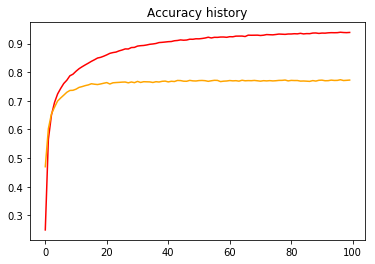

In [234]:
plt.plot(history[1], color ='red')
plt.plot(history[3], color ='orange')
plt.plot()
plt.title("Accuracy history")

Text(0.5, 1.0, 'Loss history')

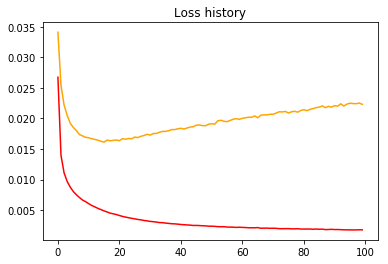

In [235]:
plt.plot(history[0], color ='red')
plt.plot(history[2], color ='orange')
plt.plot()
plt.title("Loss history")

In [238]:
%%time
train_model(net3,
               train_data=X_train_PCA,train_labels=y_train, 
                test_data = X_test_PCA, test_labels = y_test,
                epochs=100, batch_size = 128,
                optimizer=optimizer3,
            criterion=criterion ,
                train=True,
                shuffle=True 
           )

Epoch: 0 Loss: 0.0331 Acc: 0.0900 -- Test Loss: 0.0525 Test Acc: 0.2117
Epoch: 1 Loss: 0.0222 Acc: 0.3079 -- Test Loss: 0.0399 Test Acc: 0.3698
Epoch: 2 Loss: 0.0182 Acc: 0.4142 -- Test Loss: 0.0353 Test Acc: 0.4316
Epoch: 3 Loss: 0.0164 Acc: 0.4683 -- Test Loss: 0.0330 Test Acc: 0.4678
Epoch: 4 Loss: 0.0153 Acc: 0.5016 -- Test Loss: 0.0314 Test Acc: 0.4967
Epoch: 5 Loss: 0.0145 Acc: 0.5241 -- Test Loss: 0.0302 Test Acc: 0.5163
Epoch: 6 Loss: 0.0140 Acc: 0.5437 -- Test Loss: 0.0295 Test Acc: 0.5264
Epoch: 7 Loss: 0.0135 Acc: 0.5587 -- Test Loss: 0.0288 Test Acc: 0.5426
Epoch: 8 Loss: 0.0131 Acc: 0.5721 -- Test Loss: 0.0282 Test Acc: 0.5506
Epoch: 9 Loss: 0.0128 Acc: 0.5814 -- Test Loss: 0.0279 Test Acc: 0.5536
Epoch: 10 Loss: 0.0125 Acc: 0.5923 -- Test Loss: 0.0276 Test Acc: 0.5649
Epoch: 11 Loss: 0.0123 Acc: 0.5977 -- Test Loss: 0.0274 Test Acc: 0.5656
Epoch: 12 Loss: 0.0120 Acc: 0.6045 -- Test Loss: 0.0271 Test Acc: 0.5699
Epoch: 13 Loss: 0.0118 Acc: 0.6109 -- Test Loss: 0.0271 Test 

([0.03306124950710898,
  0.022213012387681523,
  0.018237325879416014,
  0.016424402813617033,
  0.015313011262326323,
  0.014549141457116499,
  0.013970562496042673,
  0.013522375634559871,
  0.013072579965770633,
  0.012808084889825433,
  0.012510158213968094,
  0.012280358481358403,
  0.012036213401057875,
  0.011846882414592284,
  0.011654061615413738,
  0.011518225542392386,
  0.011400882974238434,
  0.011258829469329086,
  0.011100656796633915,
  0.011005446363383816,
  0.010950213691302307,
  0.010861382996024157,
  0.010839667290765338,
  0.010615501838062298,
  0.010596997693998193,
  0.010551117048206559,
  0.01046054905048801,
  0.010324542570316805,
  0.010360062858545764,
  0.010249424098619305,
  0.01017632954194999,
  0.010101861848895787,
  0.010102541786042928,
  0.010031870203327221,
  0.009943539317910147,
  0.009948701602631208,
  0.009918034070023913,
  0.009803630017333668,
  0.009781654329384042,
  0.009746033767368975,
  0.009726945153209814,
  0.009643236549708

## Most informative words

In [50]:
from sklearn.svm import LinearSVC

In [167]:
%%time
clf = LinearSVC()
clf.fit(X_train, y_train)

CPU times: user 2min 15s, sys: 82.3 ms, total: 2min 15s
Wall time: 2min 15s


In [168]:
print ("Predict on test data ... ")
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : ", accuracy)

Predict on test data ... 
Accuracy :  0.8730251419302514


In [56]:
def print_top10(vectorizer, clf, class_labels):
    """
    Prints features with the highest coefficient values, per class \n
    https://stackoverflow.com/questions/11116697/how-to-get-most-informative-features-for-scikit-learn-classifiers
    """
    feature_names = vectorizer.get_feature_names()
    for i, class_label in enumerate(class_labels):
        top10 = np.argsort(clf.coef_[i])[-10:]
        print("%s: %s" % (class_label,
              ", ".join(feature_names[j] for j in top10)))

In [169]:
print_top10(tfidf, clf, all_texts.target_names)

apple_pie: streusel, dutch, peel, fill, core, lattic, cinnamon, crust, pie, appl
baby_back_ribs: bast, bone, tender, membran, babyback, slab, rack, back, rib, babi
baklava: turkish, syrup, diamond, honey, nut, pistachio, walnut, filo, phyllo, baklava
beef_carpaccio: parmesan, hacker, freezer, tenderloin, arugula, thin, shave, thinli, beef, carpaccio
beef_tartare: truffl, eesti, raw, tabasco, quail, bunsjpg, yolk, caper, beef, tartar
beet_salad: walnut, root, roast, salad, vinegar, vinaigrett, dress, goat, peel, beet
beignets: squar, dough, deepfri, evapor, confection, mond, yeast, mardi, orlean, beignet
bibimbap: spinach, bap, dab, zucchini, sprout, stone, dolsot, korean, gochujang, bibimbap
bread_pudding: warm, loaf, dayold, pour, milk, bread, stale, raisin, cube, pud
breakfast_burrito: salsa, quotekocom, wrap, sausag, breakfast, tortilla, relat, scrambl, credit, burrito
bruschetta: bread, balsam, sourdough, bruschettastyl, brush, rub, basil, toast, baguett, bruschetta
caesar_salad: c